In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt 스타일, seaborn 폰트 설정
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# 결측치 측정 라이브러리
import missingno as msno

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 바로 이 창에 그래프 결과 보여주기
%matplotlib inline

# 1. 데이터셋 확인

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

print(df_train.head())
print(df_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.1. Null Data Check

In [10]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN Values: {:.2f}%'.\
      format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    
    print(msg)

column: PassengerId	 Percent of NaN Values: 0.00%
column:   Survived	 Percent of NaN Values: 0.00%
column:     Pclass	 Percent of NaN Values: 0.00%
column:       Name	 Percent of NaN Values: 0.00%
column:        Sex	 Percent of NaN Values: 0.00%
column:        Age	 Percent of NaN Values: 19.87%
column:      SibSp	 Percent of NaN Values: 0.00%
column:      Parch	 Percent of NaN Values: 0.00%
column:     Ticket	 Percent of NaN Values: 0.00%
column:       Fare	 Percent of NaN Values: 0.00%
column:      Cabin	 Percent of NaN Values: 77.10%
column:   Embarked	 Percent of NaN Values: 0.22%


<AxesSubplot:>

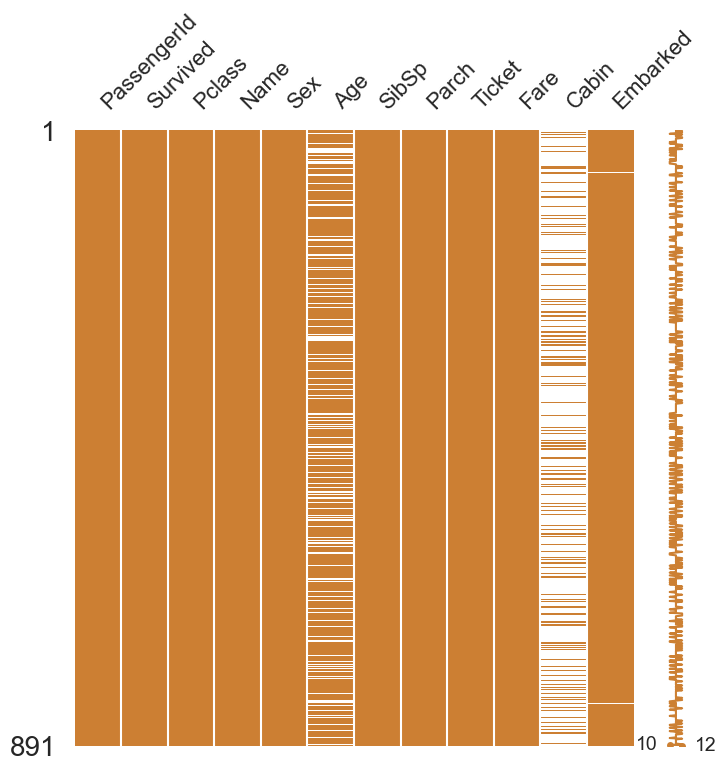

In [11]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

<AxesSubplot:>

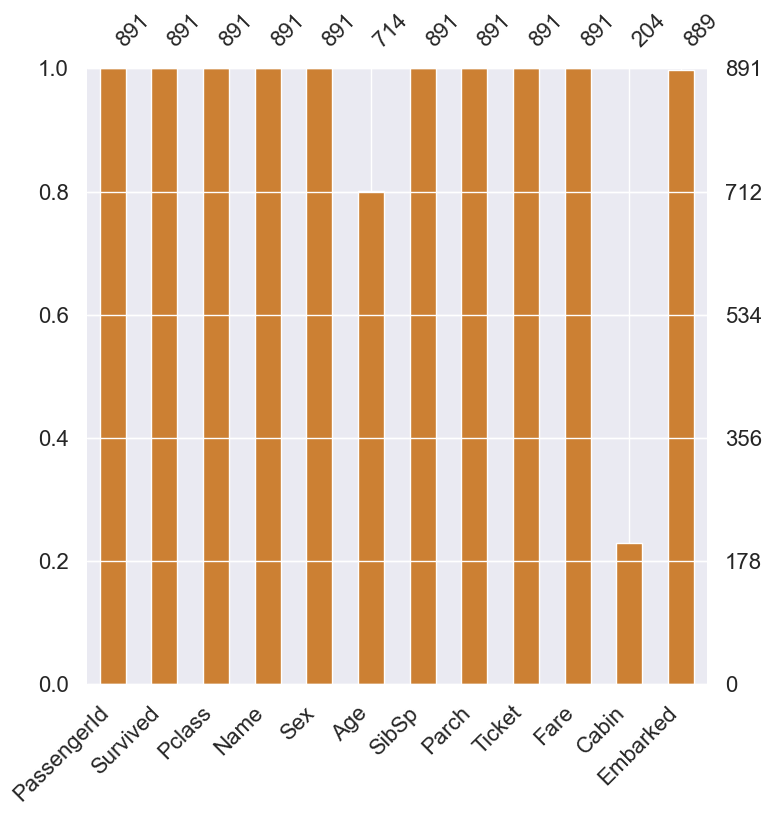

In [12]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

## 1.2. Target Label 확인

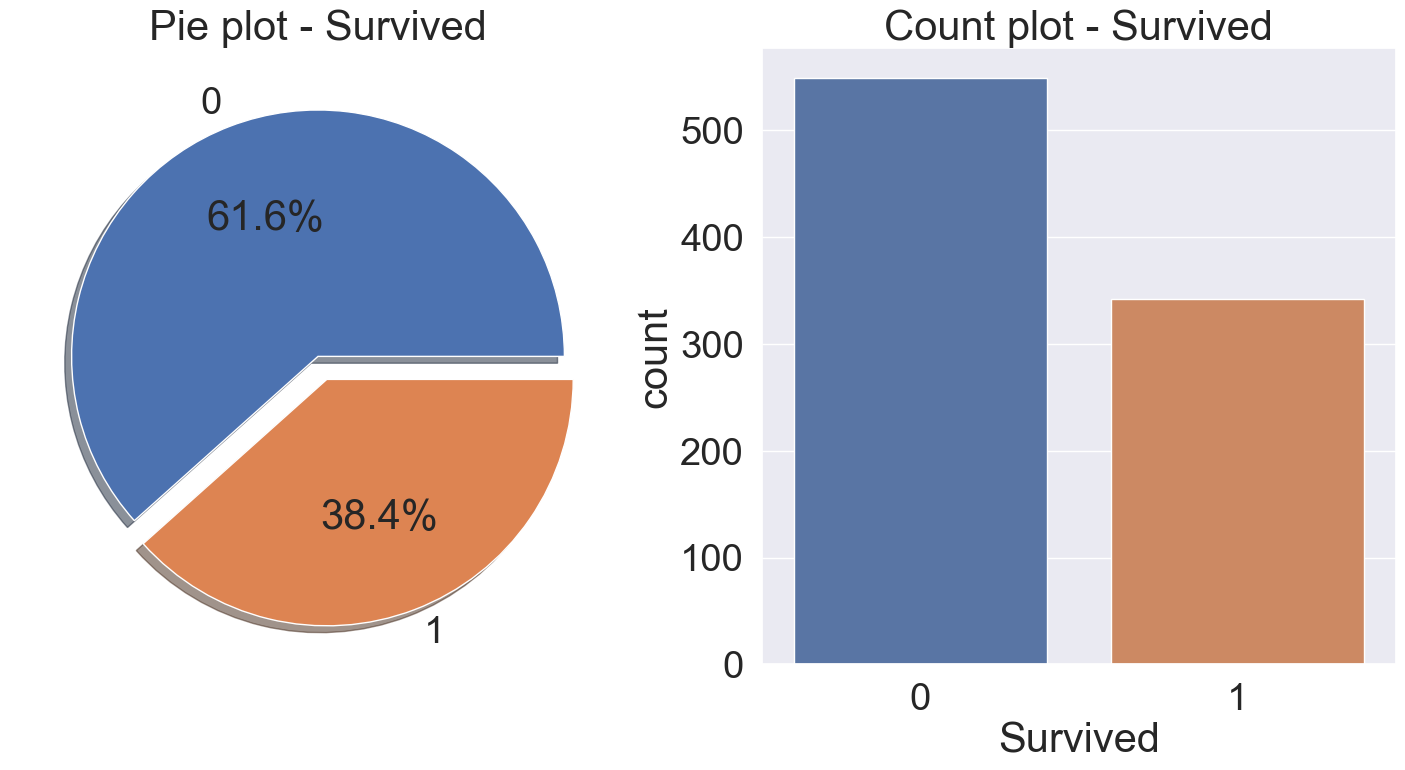

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(
    explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel("")

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 2. EDA: Exploratory Data Analysis
- 본격적 데이터 분석. 숨겨진 사실 찾기 위한 적절한 시각화.
- matplotlib.pyplot (plt), seaborn, plotly (interaction plot) 적절히 사용

## 2.1. Pclass
- ordinal & categorical data
- 어떤 pclass냐에 따른 생존률 차이--> groupby 이용

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


count와 sum의 차이: sum은 해당 숫자(1or0)를 합산함.

groupby().count()는 그냥 클래스별로 묶은 것.

### 크로스테이블 crosstab()으로 더 한눈에 보기

In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).\
  style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

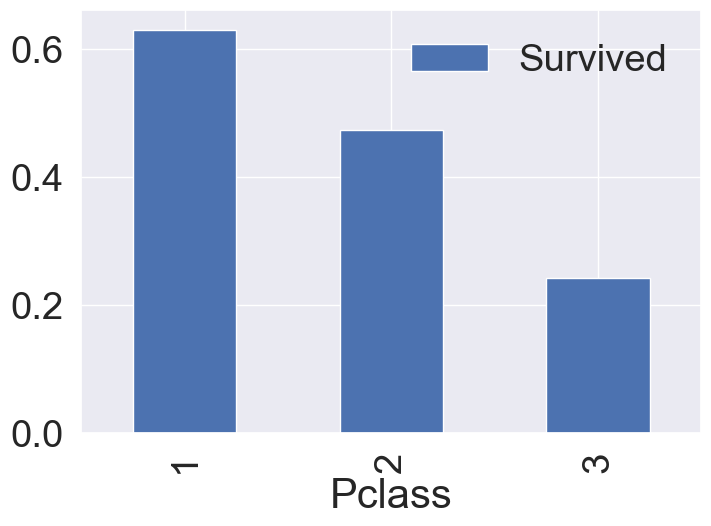

In [18]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).\
   mean().sort_values(by='Survived', ascending=False).plot.bar()

1등석일수록 생존률이 높은 모습 그래프로 확인 가능

- 더 더 한눈에 --> countplot --> 특정 레이블에 따른 개수

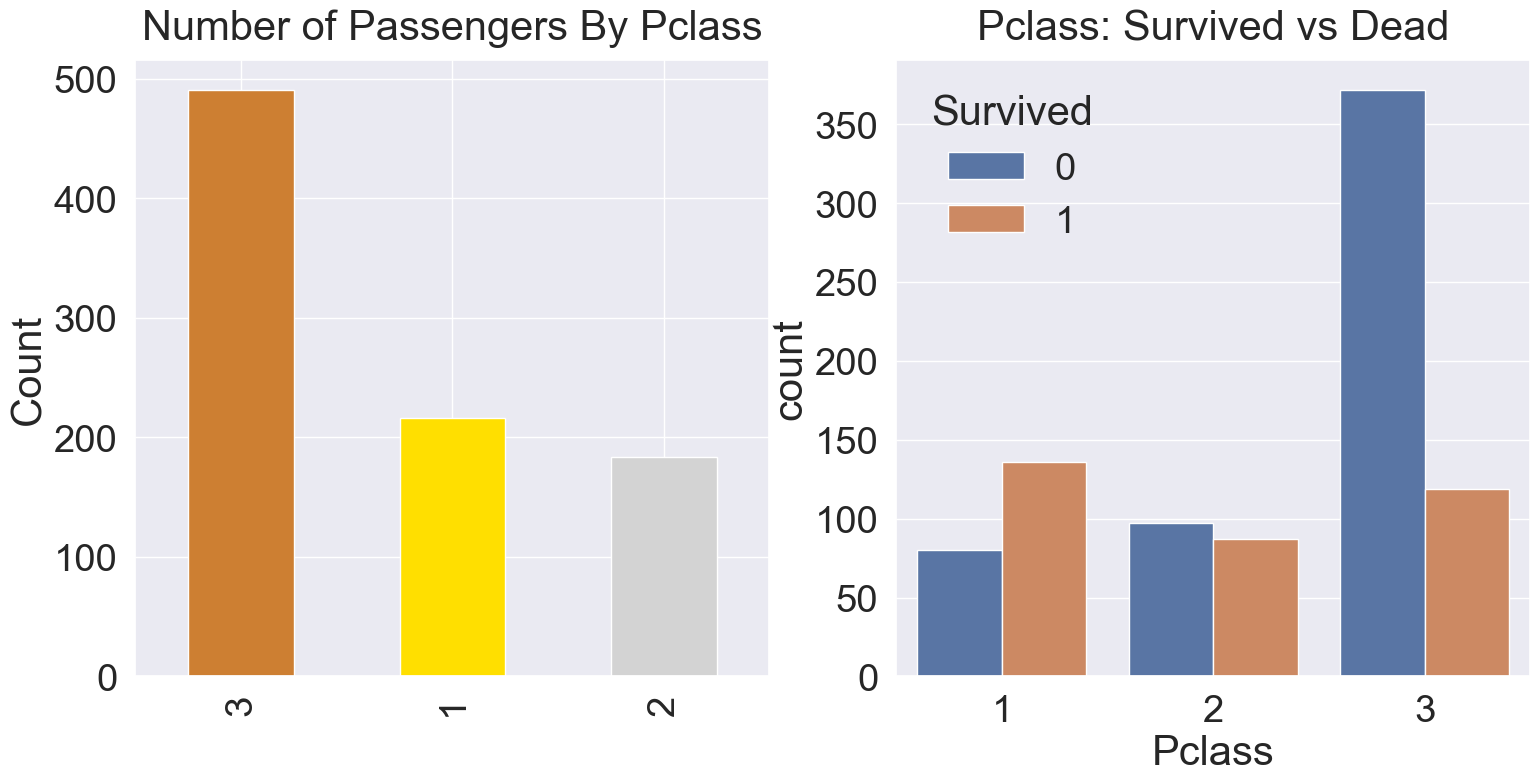

In [19]:
y_position = 1.02

f,ax = plt.subplots(1,2,figsize=(18,8))

"""
df_train[['Pclass']].value_counts() 데이터프레임으로
plot.bar 그릴려고 하면 오류남!! 
"""
df_train['Pclass'].value_counts().\
   plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title("Number of Passengers By Pclass", y=y_position)
ax[0].set_ylabel("Count")

sns.countplot("Pclass", hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead", y=y_position)

plt.show()

유일하게 1등석에서 사망자보다 생존자가 더 많았던 반면, 3등석에서 사망자가 생존자보다 훨씬 더 많았다.
- --> Pclass feature가 생존에 큰 영향을 미치며, 나중에 모델을 세울 때 이걸 사용하는 것이 좋을것이라 판단 가능.

In [20]:
df_train[['Pclass']]
# 데이터프레임 --> groupby()

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [21]:
df_train['Pclass']
# Series 타입 --> value_counts()

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

## 2.2. Sex

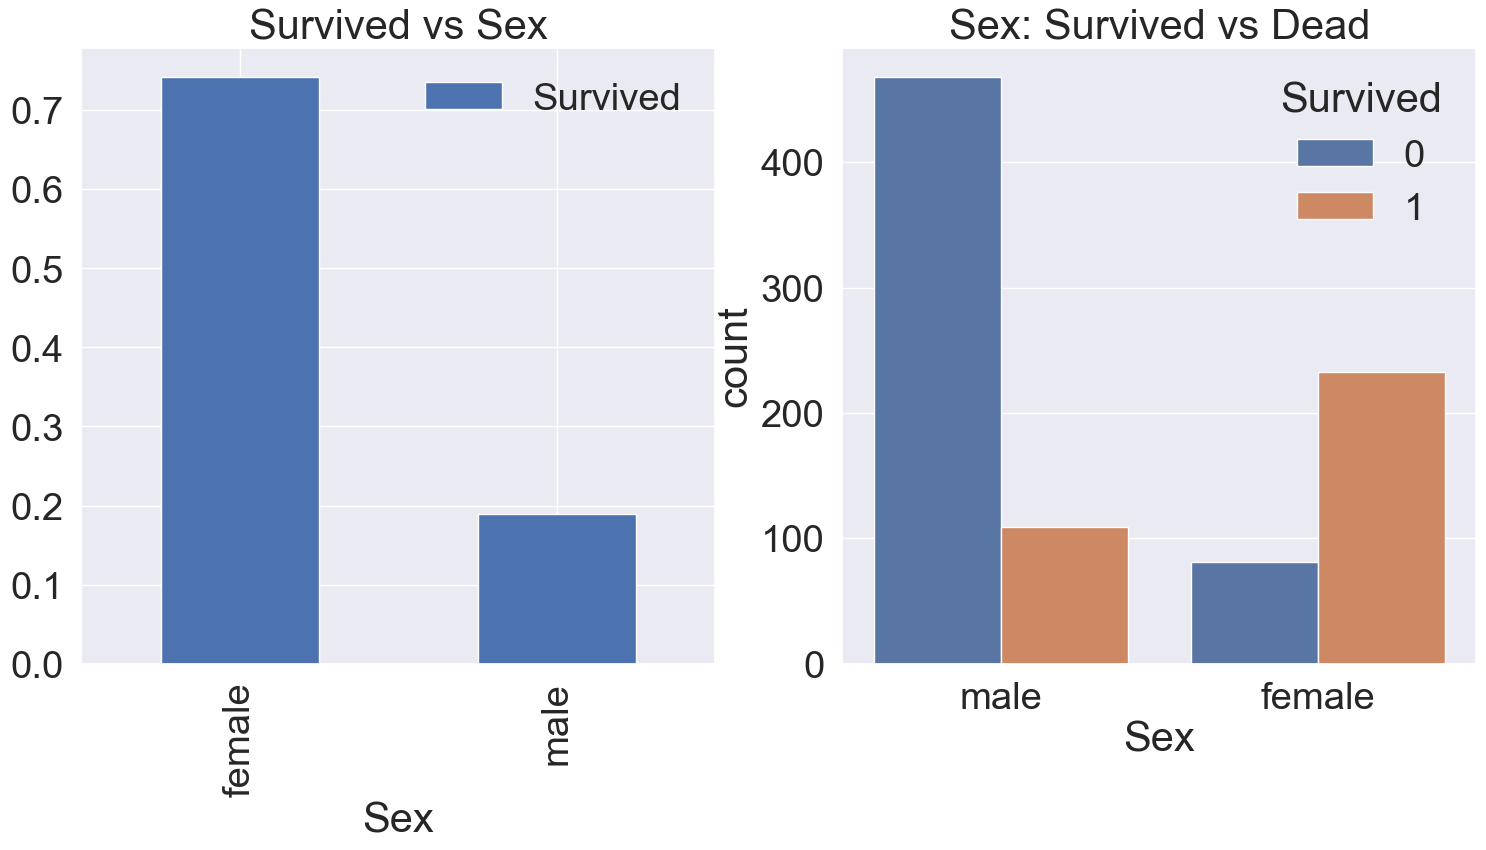

In [25]:
""" 그냥 plot vs seaborn.countplot """

f,ax = plt.subplots(1,2,figsize=(18,8))

# 성별에 따른 생존률의 평균을 바플롯으로 그리기
df_train[['Sex', 'Survived']].groupby(['Sex'],as_index=True).\
  mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")

# 성별에 따른 생존자 수를 휴로 해서 countplot 그리기
sns.countplot("Sex", hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title("Sex: Survived vs Dead")

plt.show()

In [26]:
df_train[['Sex', 'Survived']].groupby('Sex', as_index=False).\
  mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
pd.crosstab(df_train['Sex'], df_train['Survived'],margins=True).\
  style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3. Both Sex and Pclass

- seaborn.factorplot 이용 --> 3차원 그래프

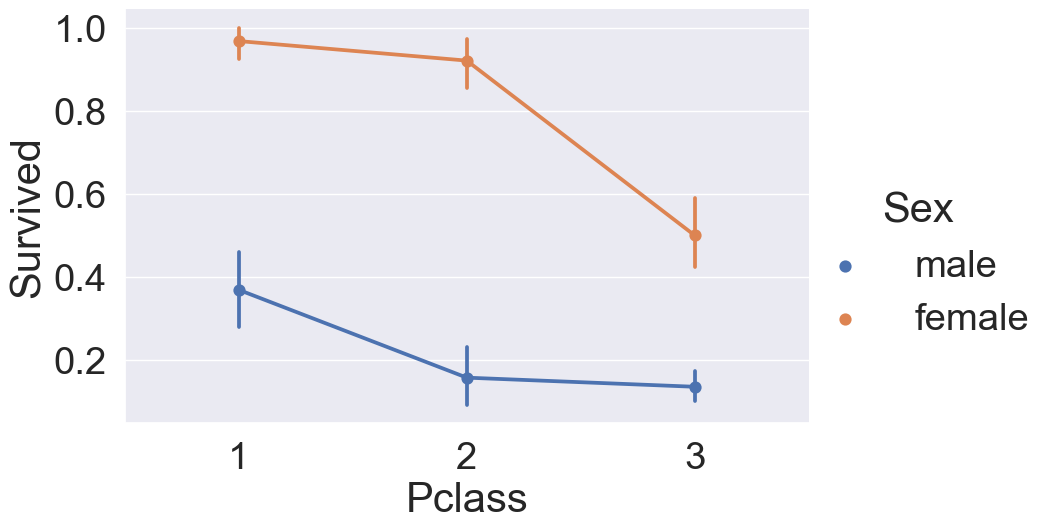

In [28]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train,
               size=6, aspect=1.5)

모든 클래스에서 female이 살 확률이 male보다 높다.
- 또한 남녀 모두 클래스가 높을수록 살 확률이 높다.
- 아래와 같이 쪼개서 표현 가능

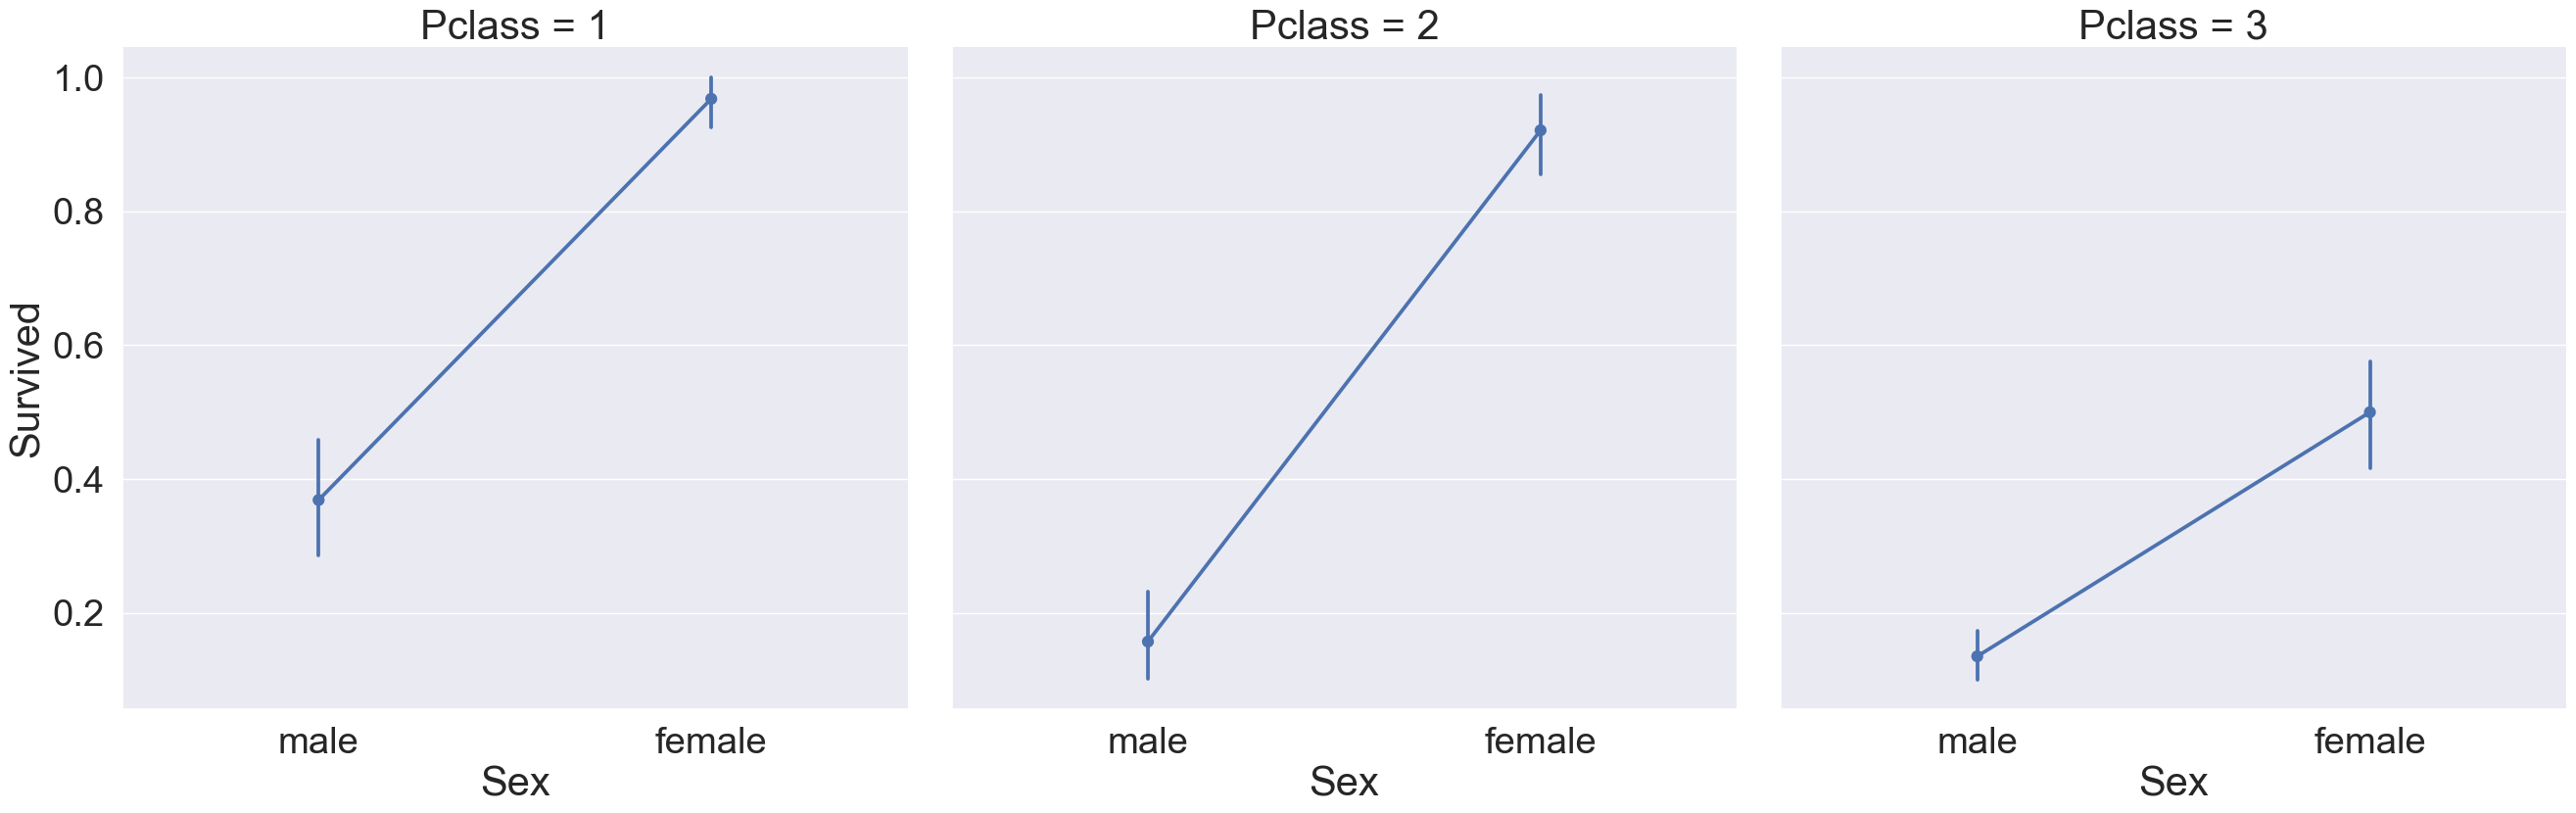

In [29]:
sns.factorplot('Sex', 'Survived', col='Pclass',
              data=df_train, satureation=.5,
              size=9, aspect=1)

3등석의 남성이 산 확률이 거의 0에 가까운 모습

## 2.4. Age

In [31]:
print("제일 나이 많은 탑승객 : {:.1f} Years".format(df_train['Age'].max()))
print("제일 어린 탑승객 : {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


kdeplot: Kernel Density Plot 
- 히스토그램의 단점 보완 
- kdeplot: 각 데이터로 밀도 분포 추정하여 합산
- histogram: 구간별 데이터 수를 barplot으로 표현

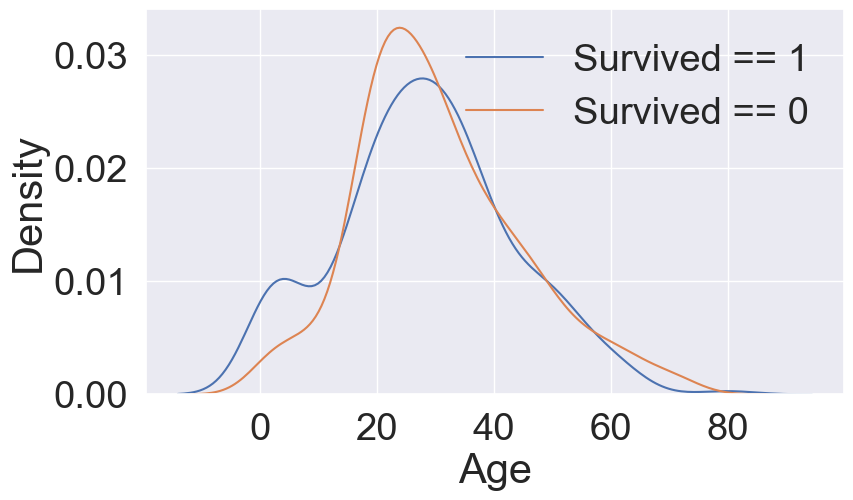

In [32]:
# 생존자에 따른 Age의 histogram

fig,ax = plt.subplots(1,1,figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax = ax)

plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()

생존자도 사망자도 20대 초에 가장 많음

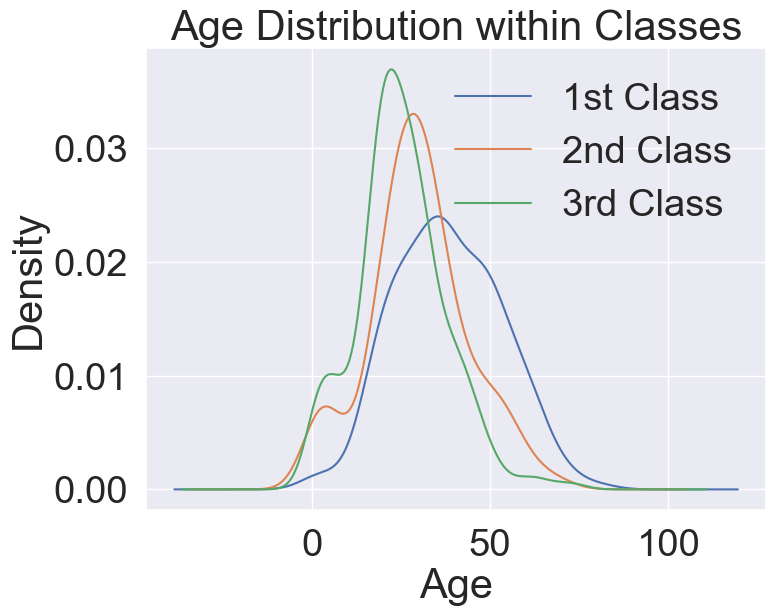

In [33]:
# Age distribution within classes

plt.figure(figsize=(8,6))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel("Age")
plt.title("Age Distribution within Classes")
plt.legend(["1st Class", "2nd Class", "3rd Class"])

class가 높을수록 나이많은 사람의 비중이 커짐.
- 나이대 변하면서 생존률 어떻게 변하는지 보기
- 나이범위를 점점 좁혀가면서

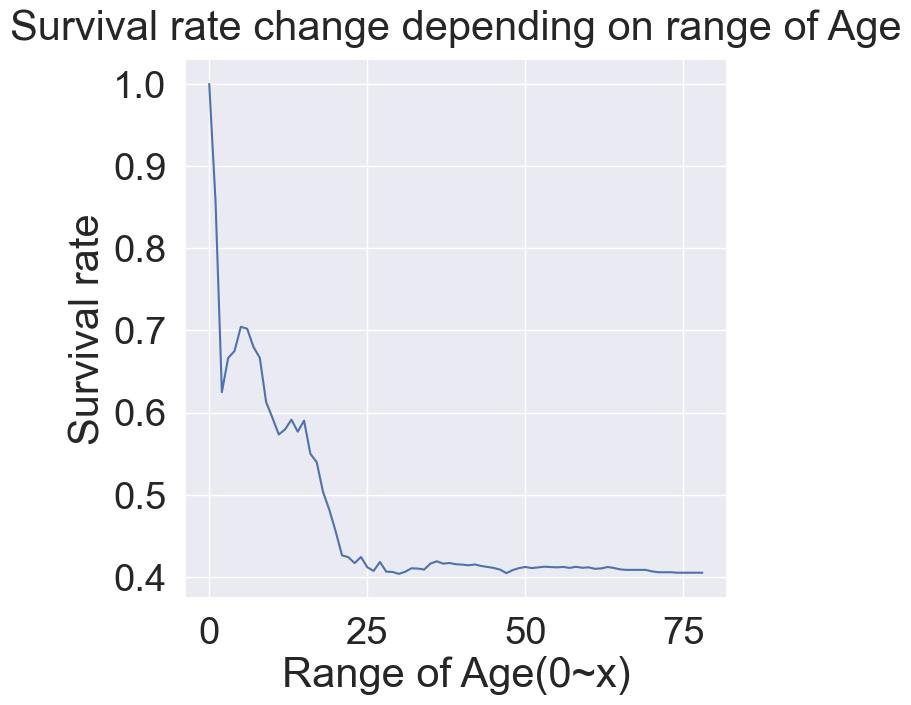

In [36]:
cummulative_survival_ratio = []

for i in range(1,80):
    # 해당 나이 이하 사람 수 대비 생존한 사람들의 비율
    n = df_train[df_train['Age']<i]['Survived'].sum()/\
       len(df_train[df_train['Age']<i]['Survived'])
    cummulative_survival_ratio.append(n)
    
plt.figure(figsize=(7,7))
plt.plot(cummulative_survival_ratio)

plt.title("Survival rate change depending on range of Age", y=1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0~x)")

plt.show()

나이가 어릴수록 생존률이 높은 것 확인 가능
- --> 나이가 중요한 feature로 쓰일 수 있음

## 2.5. Pclass, Sex, Age
- 지금까지 본 Sex, Pclass, Age, Survived 모두 보기 --> seaborn의 violinplot
- x축에 우리가 나눠서 보고싶어하는 case (Pclass, Sex), y축은 보고싶어하는 distribution (Age)

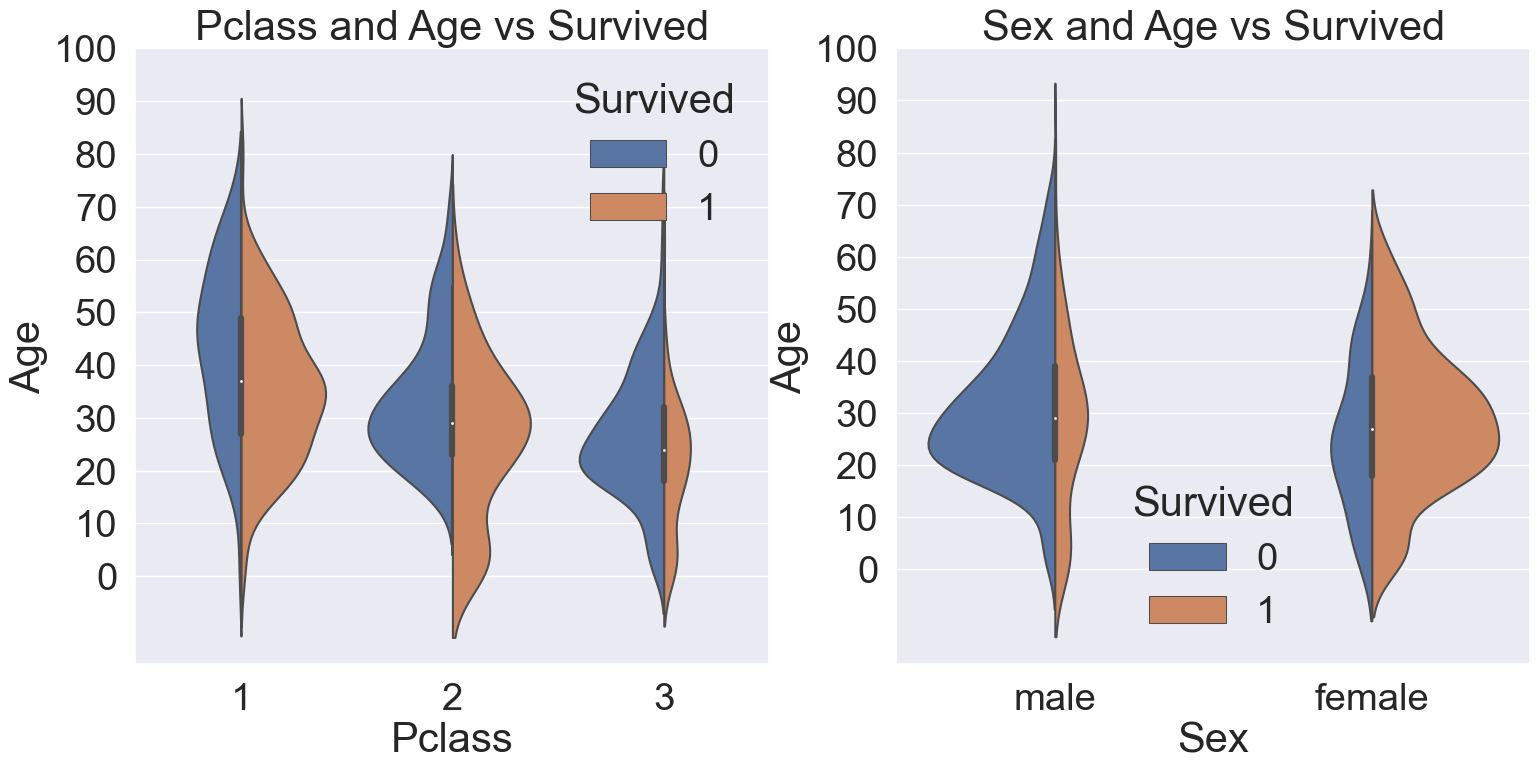

In [37]:
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train,
              scale='count', split=True, ax=ax[0])

ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived',
               data=df_train, scale='count', split=True, ax=ax[1])

ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

모든 클래스에서 나이가 어릴수록 생존을 많이함.

여성과 아이를 먼저 챙긴 것을 볼 수 있음

## 2.6. Embarked (탑승지)

<AxesSubplot:xlabel='Embarked'>

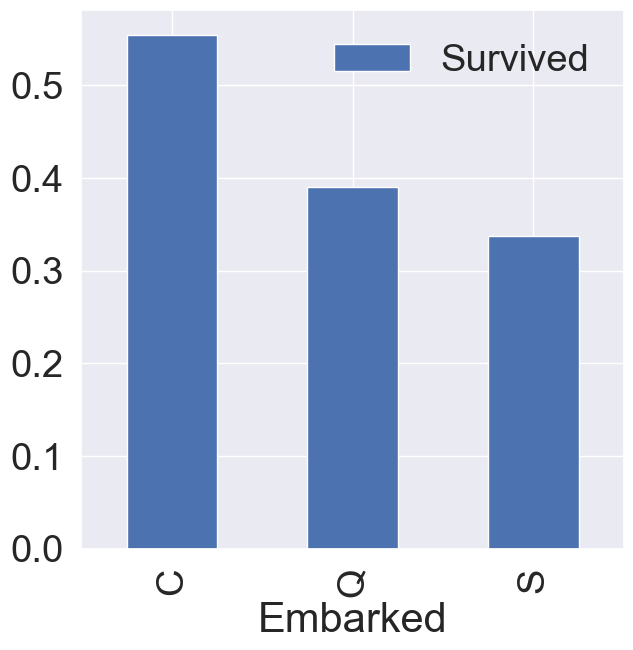

In [38]:
f, ax = plt.subplots(1,1,figsize=(7,7))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], 
                                           as_index=True).\
  mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

조금의 차이는 있지만, 생존률은 조금 비슷. 그래도 C가 제일 높음
- 모델에 미비한 영향 예상. 그래도 사용 
- 모델 만들고 나면 사용 feature들이 얼마나 중요한 역할 했는지 확인 가능. 
- 다른 feature로 split 해서 살펴보기

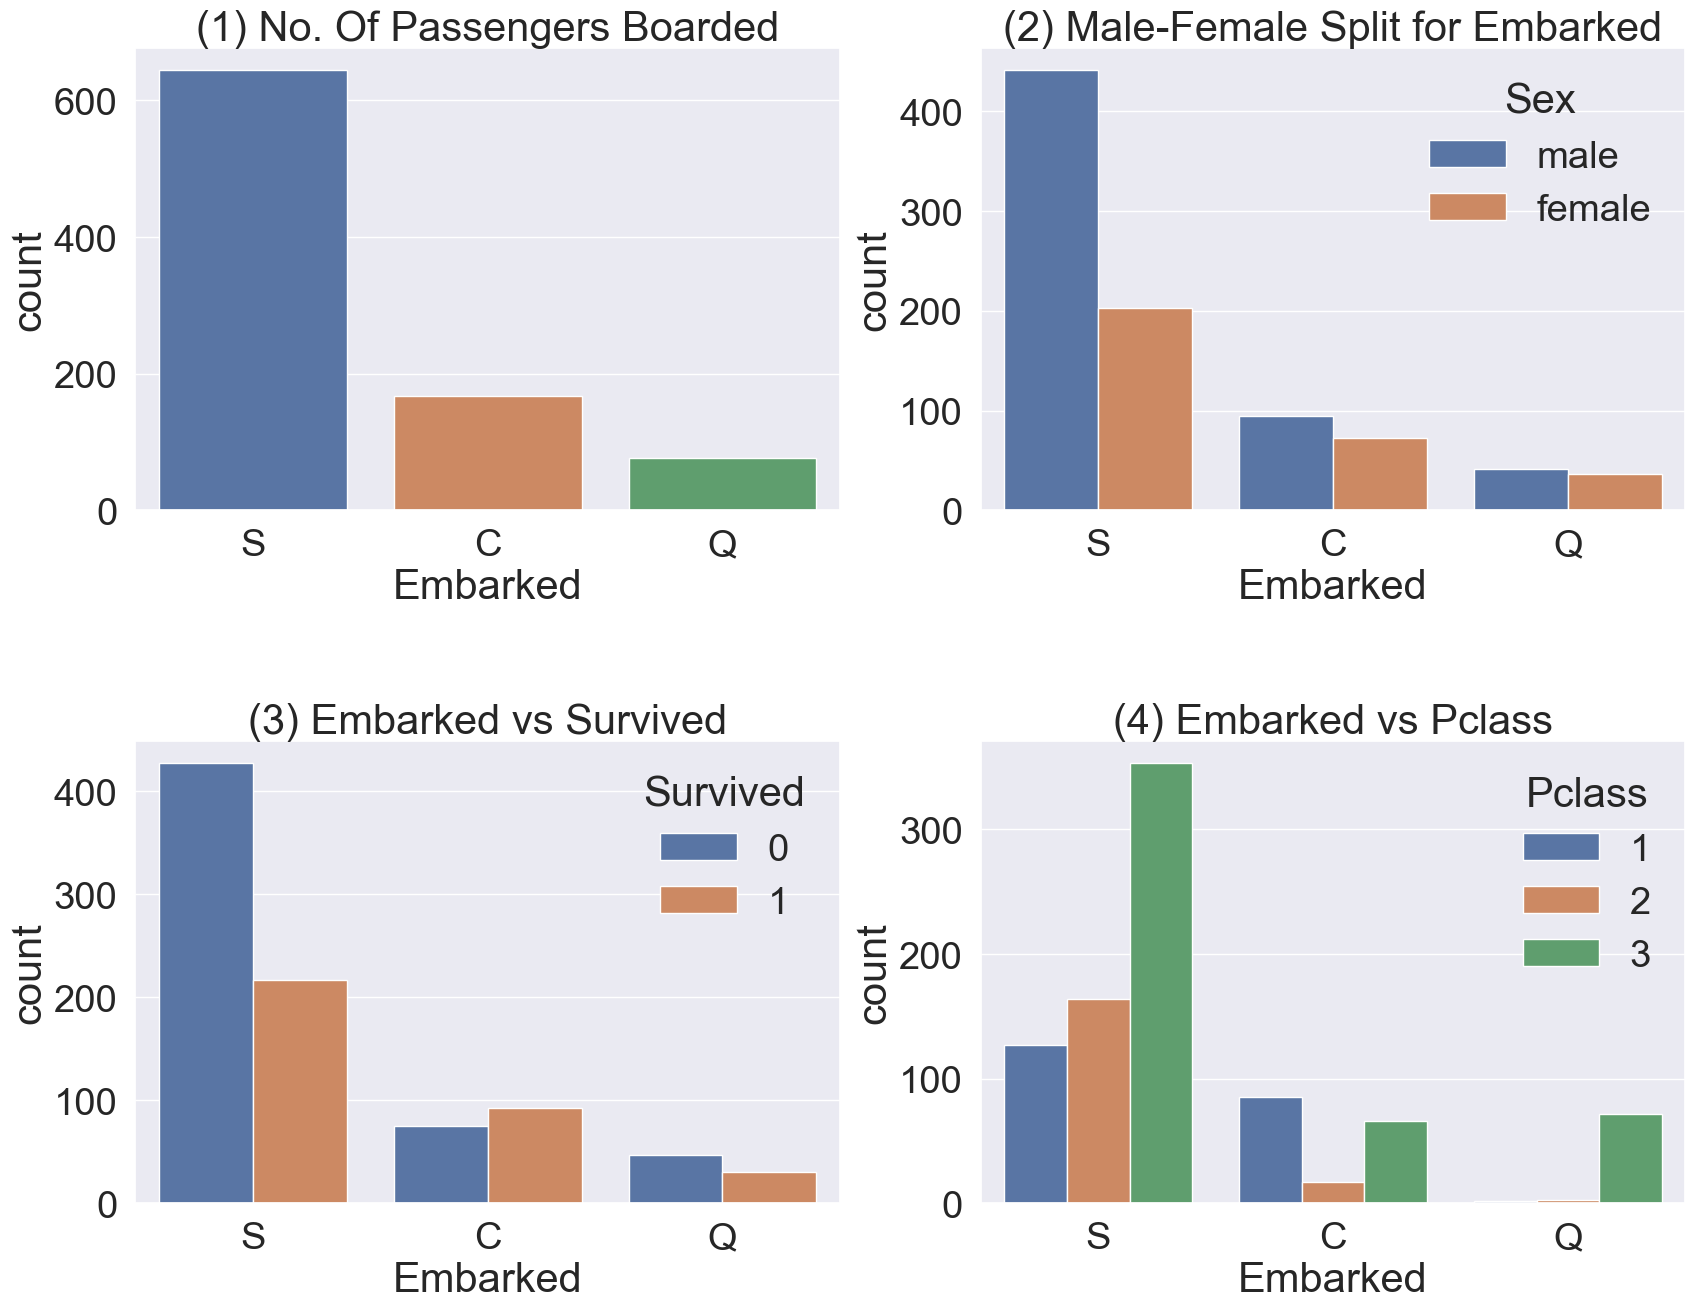

In [39]:
f, ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot("Embarked", data=df_train, ax=ax[0,0])
ax[0,0].set_title("(1) No. Of Passengers Boarded")

sns.countplot("Embarked", hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title("(2) Male-Female Split for Embarked")

sns.countplot("Embarked", hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title("(3) Embarked vs Survived")

sns.countplot("Embarked", hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title("(4) Embarked vs Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

(4)에서 확인해보니 C가 생존확률 높은건 1클래스 사람들이 많이 타서 그런것임. S는 3클래스 사람들이 많아서 생존률이 낮게 나옴.

## 2.7. Family: SibSp(형제자매)+Parch(부모,자녀)

In [22]:
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize'] = df_test['SibSp']+df_test['Parch']+1
# 자기 자신 포함 

print("Maximim size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximim size of Family:  11
Minimum size of Family:  1


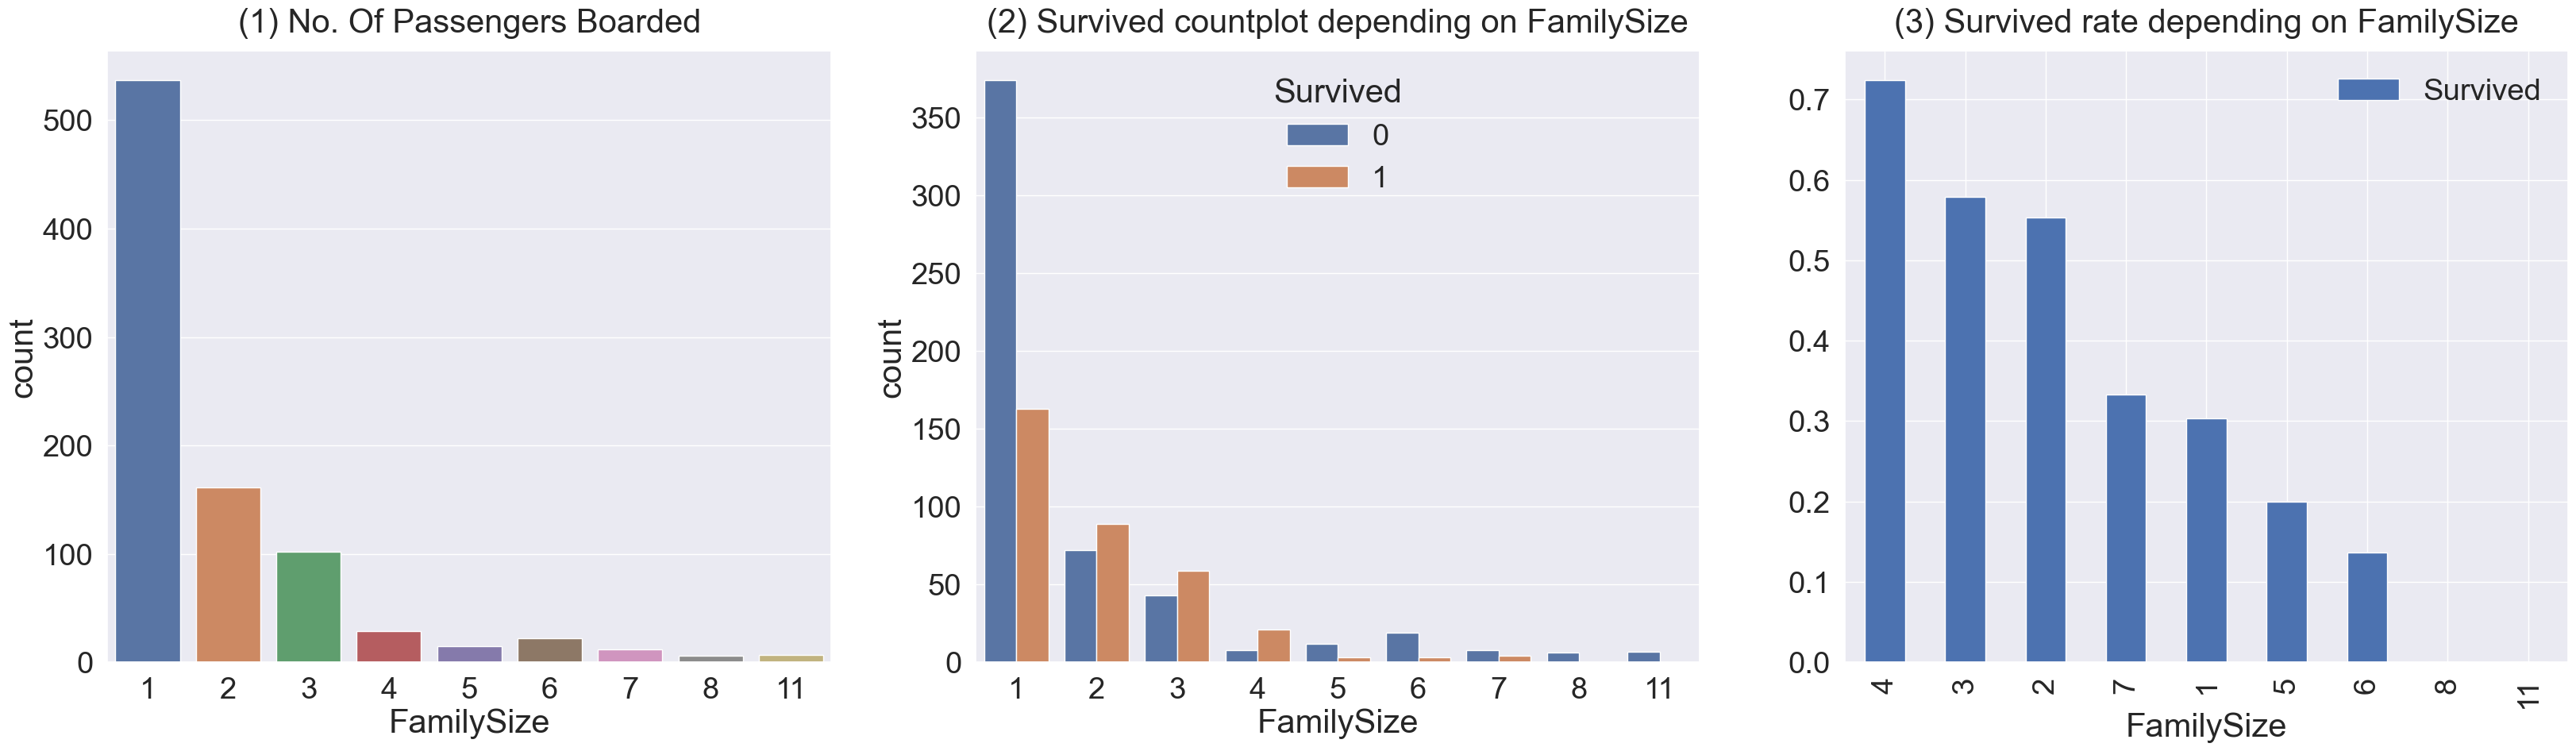

In [23]:
# FamilySize와 생존의 관계

f,ax = plt.subplots(1,3,figsize=(40,10))

sns.countplot("FamilySize", data=df_train, ax=ax[0])
ax[0].set_title("(1) No. Of Passengers Boarded", y=1.02)

sns.countplot("FamilySize", hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title("(2) Survived countplot depending on FamilySize", y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'],
                                            as_index=True).\
  mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title("(3) Survived rate depending on FamilySize", y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

1인 가구, 그 다음 2,3,4.. 가구 순으로 가장 많음 
- 4인 가구에서 생존확률이 가장 높았음. 너무 작아도(1), 너무 커도(5,6) 생존률 작음

## 2.8. Fare
- 연속변수 --> 히스토그램

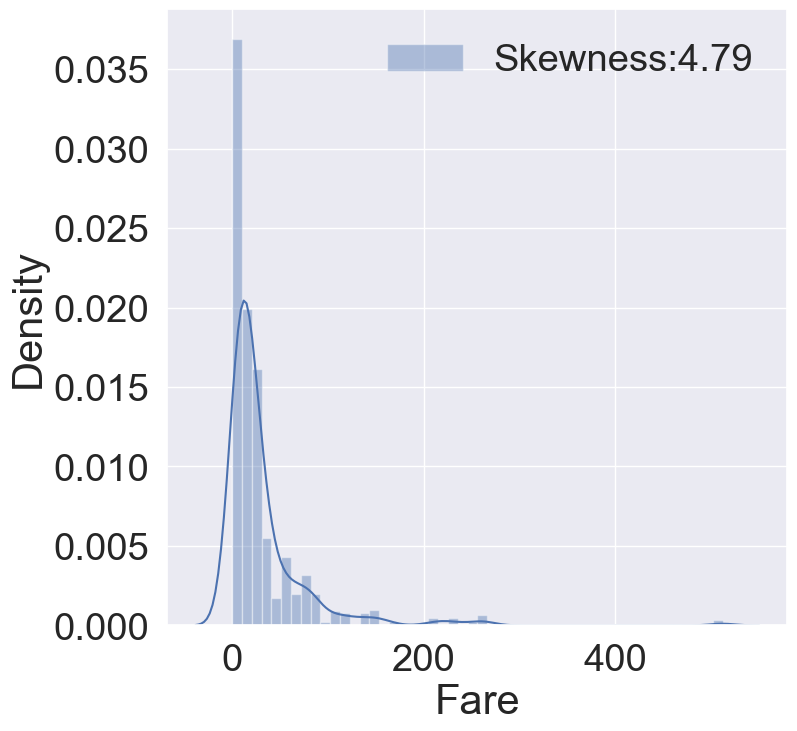

In [43]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train["Fare"], color='b', label='Skewness:{:.2f}'\
                .format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

분포가 매우 비대칭 --> 이대로 모델에 넣어주면 안됨. 
- outlier 영향 줄이기 위해 Fare에 log 취해주기
- Fare 열의 모든 데이터를 log값 취하기.
- --> lambda 함수에 map 적용

In [3]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
# testset에 있는 결측치를 평균값으로 치환

x = lambda i: np.log(i) if i>0 else 0

df_train['Fare'] = df_train['Fare'].map(x)
df_test['Fare'] = df_test['Fare'].map(x)

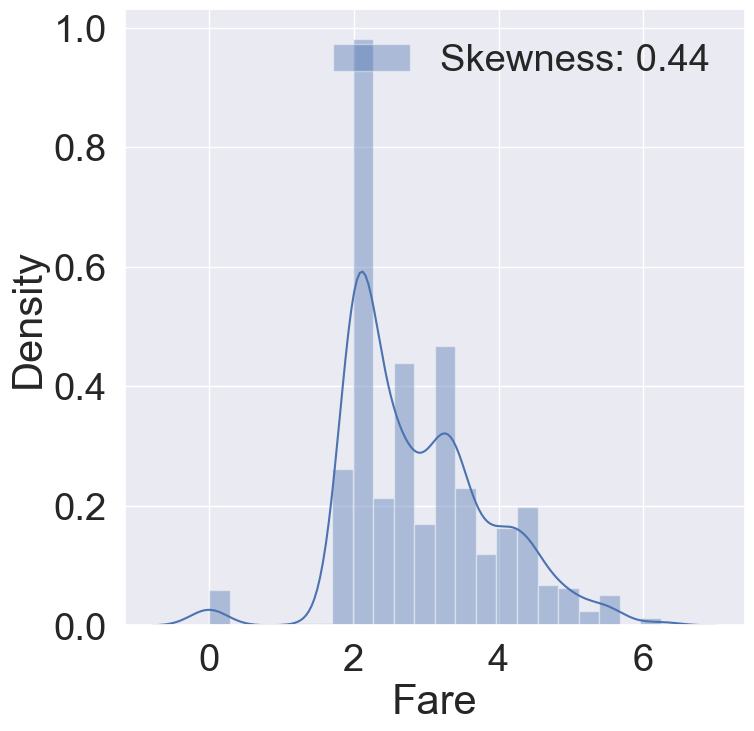

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b', label='Skewness: {:.2f}'\
                .format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

log 취하니 비대칭성 많이 사라짐.
- 이렇게 모델이 좀더 좋은 성능 내도록 할 수 있음.
- 사실 이건 feature engineering에 들어가는 작업.

## 2.9. Cabin
- NaN이 80% 여서, 생존에 영향 요인 정보 얻어내기 쉽지 않음 --> 모델에 포함시키지 않기!

In [46]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10. Ticket
- string data, 아이디어 필요

In [47]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

티켓 넘버 매우 다양(681) --> 어떤 특징을 이끌어내서 생존과 연관시킬 수 있을까?

# 3. Feature Engineering
- 가장먼저, null값 채우기
- 해당 feature의 통계 참고 or 다른 아이디어
- 결측치를 어떻게 채우냐에 따라 모델 성능 좌우
- train, test 둘다 적용해줘야 함.

## 3.1. Fill Null
### 3.1.1. Fill Null in Age using Title
- Age의 결측치 177개. --> title& statistics 이용
- 영어의 Title: Miss, Mr, Mrs 등 --> 각 탑승객의 이름에 꼭 들어감.
- 판다스 시리즈의 str 메소드, 정규표현 가능하게 해주는 extract 메소드 사용 --> title 추출, initial column에 저장

In [5]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
# Salutation (title) 추출

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [51]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.\
  background_gradient(cmap='summer_r')
# Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [6]:
""" 남자 여자가 쓰는 initial 구분 """

df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major',
                            'Lady', 'Countess', 'Jonkheer', 'Col',
                            'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs',
                           'Mrs', 'Other', 'Other', 'Other', 
                            'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major',
                            'Lady', 'Countess', 'Jonkheer', 'Col',
                            'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs',
                           'Mrs', 'Other', 'Other', 'Other', 
                            'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605


여성 title 'Miss', 'Mrs'가 생존률이 높음.

<AxesSubplot:xlabel='Initial'>

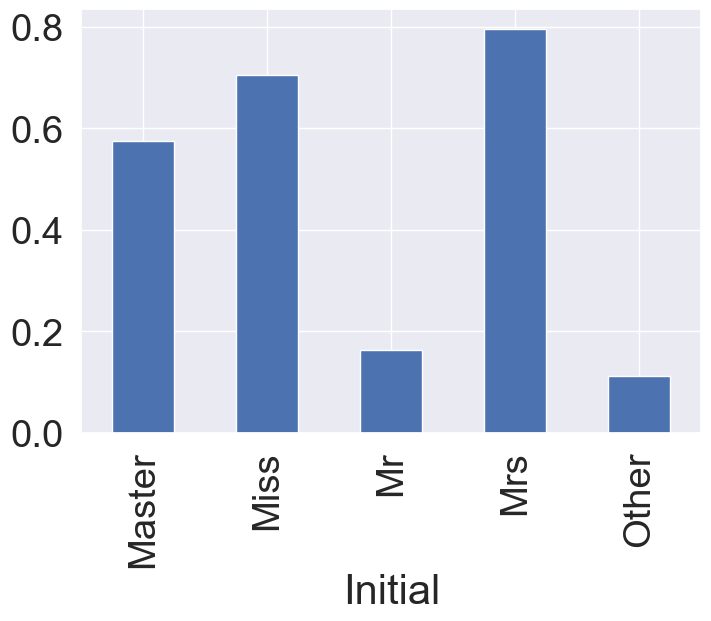

In [7]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

#### <null data 채우는 방법>

1) train data의 통계 활용
- 이걸 기반으로 test의 null data 채워줌

2) 새로운 머신러닝 알고리즘 만들어 예측해서 채워넣기 

In [55]:
df_train.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age 의 평균 이용! 
- loc + boolean + column을 사용해 값 치환 !! --> 자주 쓰임

In [8]:
df_train.loc[(df_train.Age.isnull())&
             (df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&
             (df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&
             (df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&
             (df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&
             (df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_train.Age.isnull())&
             (df_train.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_train.Age.isnull())&
             (df_train.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_train.Age.isnull())&
             (df_train.Initial=='Master'),'Age'] = 5
df_test.loc[(df_train.Age.isnull())&
             (df_train.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_train.Age.isnull())&
             (df_train.Initial=='Other'),'Age'] = 46

### 3.1.2. Fill Null in Embarked

In [9]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), 
     'Null values')

Embarked has  2 Null values


In [10]:
df_train['Embarked'].fillna('S', inplace=True)

가장 많은 탑승객이 있던 S로 채워서 저장

## 3.2. Change Age (연속-->범주)

연속 변수를 범주형으로 바꾸면 정보손실이 생길 수도 있지만,,,
- loc 으로 10살 간격으로 나이 범주 나누기

In [11]:
df_train['Age_cat'] = 0

df_train.loc[df_train['Age']<10, 'Age_cat'] = 0
df_train.loc[(10<=df_train['Age'])&(df_train['Age']<20), 'Age_cat'] = 1
df_train.loc[(20<=df_train['Age'])&(df_train['Age']<30), 'Age_cat'] = 2
df_train.loc[(30<=df_train['Age'])&(df_train['Age']<40), 'Age_cat'] = 3
df_train.loc[(40<=df_train['Age'])&(df_train['Age']<50), 'Age_cat'] = 4
df_train.loc[(50<=df_train['Age'])&(df_train['Age']<60), 'Age_cat'] = 5
df_train.loc[(60<=df_train['Age'])&(df_train['Age']<70), 'Age_cat'] = 6
df_train.loc[70<=df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0

df_test.loc[df_train['Age']<10, 'Age_cat'] = 0
df_test.loc[(10<=df_train['Age'])&(df_train['Age']<20), 'Age_cat'] = 1
df_test.loc[(20<=df_train['Age'])&(df_train['Age']<30), 'Age_cat'] = 2
df_test.loc[(30<=df_train['Age'])&(df_train['Age']<40), 'Age_cat'] = 3
df_test.loc[(40<=df_train['Age'])&(df_train['Age']<50), 'Age_cat'] = 4
df_test.loc[(50<=df_train['Age'])&(df_train['Age']<60), 'Age_cat'] = 5
df_test.loc[(60<=df_train['Age'])&(df_train['Age']<70), 'Age_cat'] = 6
df_test.loc[70<=df_train['Age'], 'Age_cat'] = 7

In [12]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [13]:
print((df_train['Age_cat']==df_train['Age_cat_2']).all())

True


In [14]:
df_train.drop(['Age','Age_cat_2'],axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## 3.3. Change Initial, Embarked and Sex (string-->numerical)

- 5개 Initial 수치화 

In [15]:
df_train['Initial'] = df_train['Initial'].\
     map({'Master':0,'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

df_test['Initial'] = df_test['Initial'].\
     map({'Master':0,'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [16]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [17]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df_train['Embarked'] = df_train['Embarked'].\
   map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].\
   map({'C':0, 'Q':1, 'S':2})

In [19]:
df_train['Embarked'].isnull().any()

False

In [20]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

## feature 간 상관관계 구하기!
- 두 변수간 Perason Correlation 구하면 (-1,1) 사이값 얻을 수 있음. -1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계. 0은 상관관계가 없다는 것을 의미. 

- "heatmap plot" 여러 변수들간의 행렬 --> corr() 메소드, seaborn으로 편하게 그릴 수 있음. 

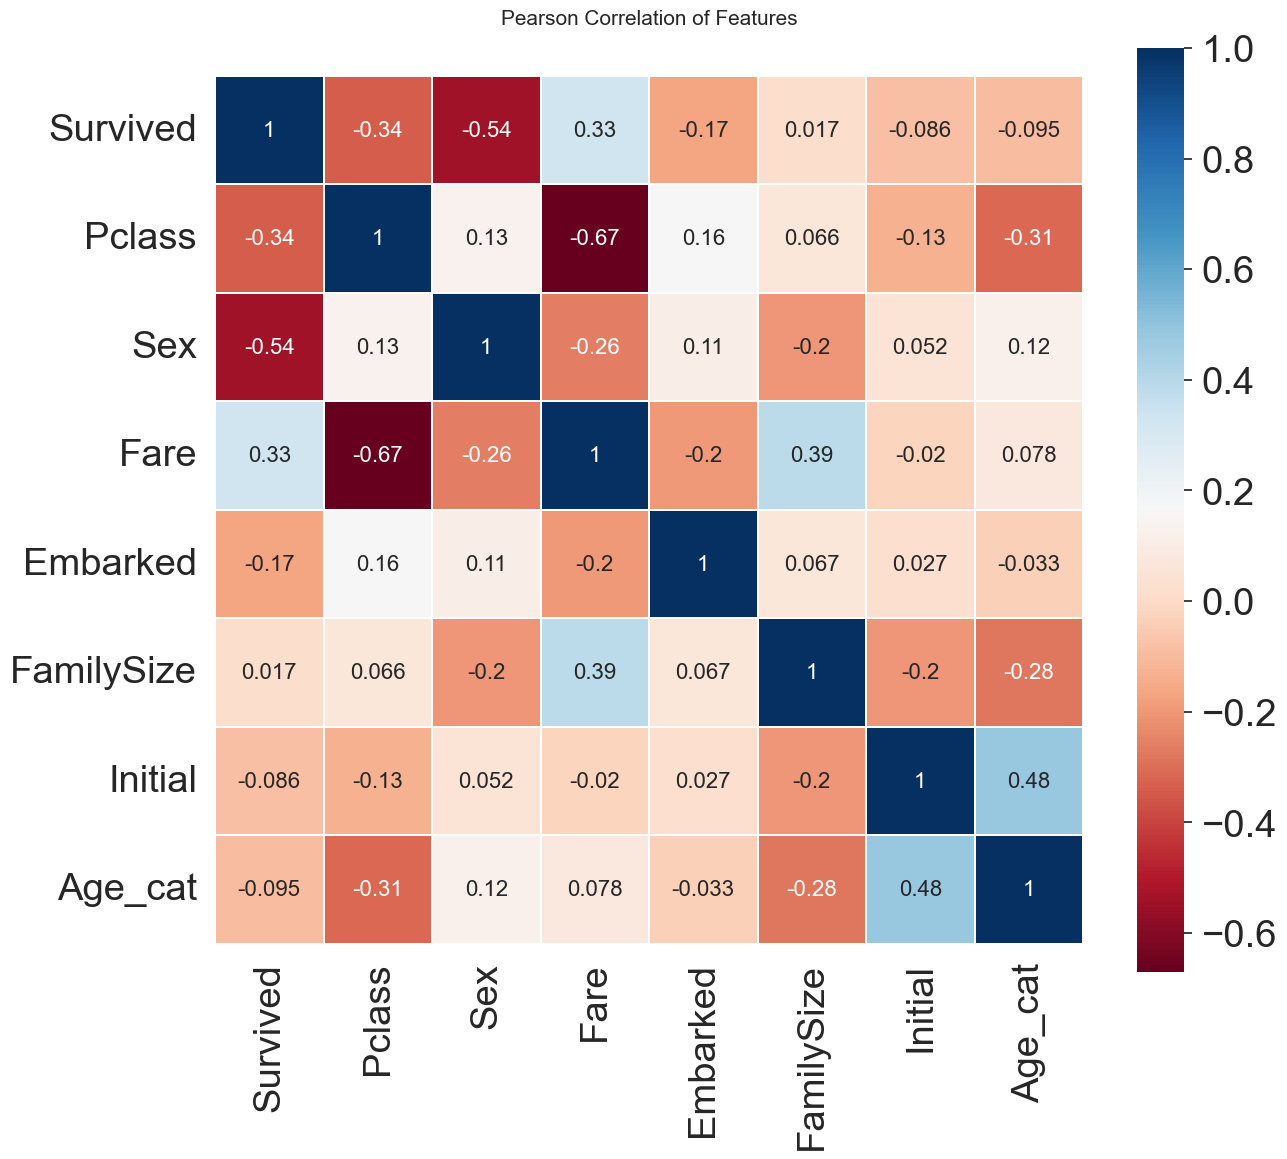

In [24]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 
        'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title("Pearson Correlation of Features", y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1,
           vmax=1.0, square=True, cmap=colormap, linecolor='white',
           annot=True, annot_kws={"size":16})

del heatmap_data

Sex 와 Pclass 가 Survived 에 상관관계 있음 

- 중요: 서로 강한 관계 가지는 feature들이 없음! 
- --> 모델 학습시킬 때 불필요한 feature가 없음! 1 or -1 의 관계를 가진 feature 가 있다면 우리가 얻을 수 있는 정보는 하나여서 

## 3.4. One-hot encoding on Initial and Embarked
- 수치화된 카테고리 데이터를 그대로 넣어도 되지만, 모델 성능 높이기 위해 one-hot encoding
- pandas의 get_dummies 메소드
- 새로운 5개의 칼럼이 생겨남 

In [25]:
df_train = pd.get_dummies(df_train, columns=['Initial'], 
                         prefix='Initial')

df_test = pd.get_dummies(df_test, columns=['Initial'],
                         prefix='Initial')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,3,2,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,2,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,2,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,3,1,0,0,1,0,0


In [26]:
df_train = pd.get_dummies(df_train, columns=['Embarked'],
                         prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'],
                        prefix='Embarked')

범주가 100개가 넘어가면 원핫인코딩 매우 비효율적!! --> 다른방법!
- sklearn으로 Labelencoder + OneHotencoder 이용해도 one-hot encoding 가능 

## 3.5. Drop columns
- 필요한 열만 남기고 다 지우기

In [27]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket',
              'Cabin'], axis=1, inplace=True)

df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket',
              'Cabin'], axis=1, inplace=True)

df_train.head()

,Survived,Pclass,Sex,Fare,Age_cat,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,3,2,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,2,1,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,3,2,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,3,1,0,0,1,0,0,0,0,1


In [28]:
df_test.head()

,Pclass,Sex,Fare,Age_cat,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,2,1,0,0,1,0,0,0,1,0
1,3,0,1.945910,3,2,0,0,0,1,0,0,0,1
2,2,1,2.270836,2,1,0,0,1,0,0,0,1,0
3,3,1,2.159003,3,1,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,3,0,0,0,1,0,0,0,1


# 4. Building Machine learning model and prediction using the trained model
- sklearn 사용해 본격적으로 머신러닝 모델 만들기

In [29]:
# 모든 필요한 머신러닝 패키지 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 모델 평가
from sklearn.model_selection import train_test_split
# training set을 쉽게 나눠주는 함수

sklearn에는 머신러닝의 모든 것이 다 있음. feature engineering, preprocessing, 지도학습 알고리즘, 비지도학습 알고리즘, 모델평가, 파이프라인 등 머신러닝에 관한 모든 작업들이 손쉬운 인터페이스로 구현되어 있음. 데이터분석+머신러닝 하고 싶으면, 이 라이브러리 반드시 숙지
- 목적: 데이터의 input(survived제외) 가지고 모델 최적화해서 각 샘플의 생존유무를 판단하는 모델 만들기
- 예측: 모델이 학습하지 않았던 test set을 input으로 줘서 test set의 생존 유무 예측하기

## 4.1. 준비: Split dataset into train, valid, test set
- 가장 먼저 학습에 쓰일 데이터와 target label 분리. drop 사용해 간단히 할 수 있음.

In [30]:
"""
values 메소드 사용시, array() 형태로 전환
"""

x_train = df_train.drop("Survived", axis=1).values
target_label = df_train['Survived'].values
x_test = df_test.values

In [31]:
target_label[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [80]:
x_train[:10]

array([[3.        , 1.        , 1.98100147, 2.        , 2.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 4.26666208, 2.        , 3.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        ],
       [3.        , 0.        , 2.07002232, 1.        , 2.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 0.        , 3.97217693, 2.        , 3.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        ],
       [3.        , 1.        , 2.08567209, 1.        , 3.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [3.        , 1.        , 2.13514821, 1.        , 3.        ,
        0.        , 0.     

In [32]:
x_train.shape

(891, 13)

In [33]:
x_tr, x_vld, y_tr, y_vld = train_test_split(\
    x_train, target_label, test_size=0.3, random_state=2018)

"랜덤포레스트" 모델 사용
- 결정트리기반. 
- 파라미터 튜닝은 기본 세팅으로!

## 4.2. Model Generation and Prediction

In [34]:
model = RandomForestClassifier()
model.fit(x_tr, y_tr)
prediction = model.predict(x_vld)

print("총 {}명 중 {:.2f}% 정확도로 생존을 맞춤".format(\
  y_vld.shape[0], 100*metrics.accuracy_score(prediction,y_vld)))

총 268명 중 83.21% 정확도로 생존을 맞춤


## 4.3. Feature Importance
- 학습된 모델은 feature importance를 가지게 됨. --> 확인하여 이 모델이 어떤 feature에 영향을 많이 받는지 볼 수 있음.

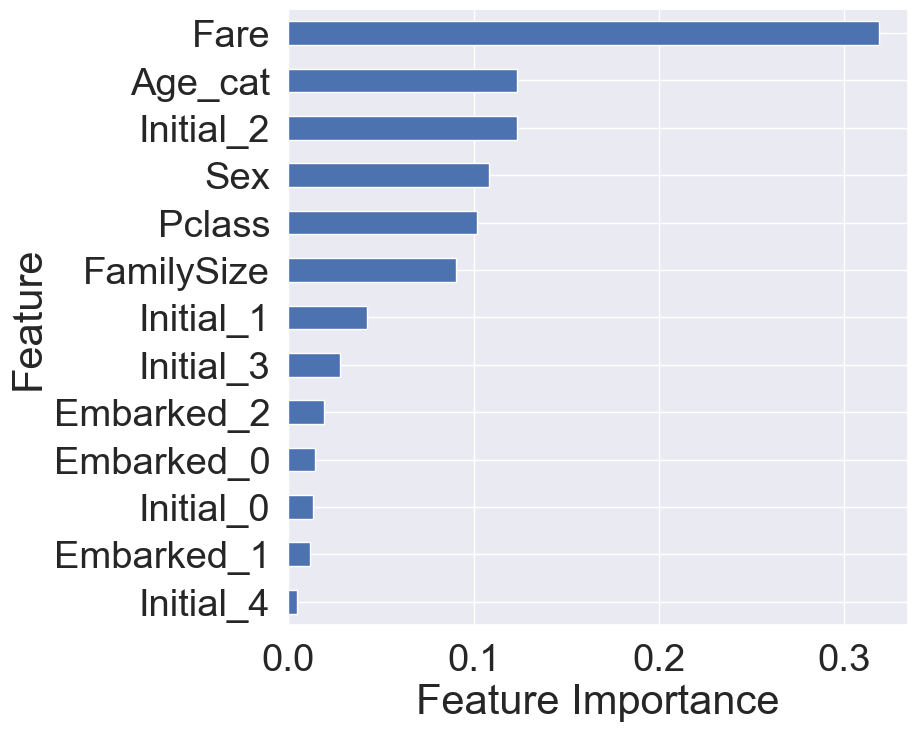

In [35]:
from pandas import Series

feature_importance = model.feature_importances_

Series_feat_imp = Series(feature_importance, index=df_test.columns)

plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()

plt.xlabel("Feature Importance")
plt.ylabel("Feature")

plt.show()

## 4.4. Prediction on Test set

In [36]:
submission = pd.read_csv("./gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [37]:
prediction = model.predict(x_test)
submission['Survived'] = prediction

print(submission.head())

submission.to_csv('./my_first_submission.csv', index=False)

   PassengerId  Survived
0          892         1
1          893         1
2          894         0
3          895         0
4          896         1
